In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

all_df = pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_eval_22june/adaptive_speak_eval_all_v15.csv', on_bad_lines='skip')
print('target domain   :', all_df['target domain'].unique())
print('listener domain :', all_df['listener domain'].unique())
print('simulator domain:', all_df['simulator domain'].unique())

df = pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_eval_22june/adaptive_speak_eval_food_v2.csv')
print('target domain   :', df['target domain'].unique())
print('listener domain :', df['listener domain'].unique())
print('simulator domain:', df['simulator domain'].unique())

In [2]:
# _df = pd.concat([
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/28sept/adaptive_speak_test_out_domain_appliances.csv', error_bad_lines=False, warn_bad_lines=True),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/28sept/adaptive_speak_test_out_domain_food.csv', error_bad_lines=False, warn_bad_lines=True),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/28sept/adaptive_speak_test_out_domain_indoor.csv', error_bad_lines=False, warn_bad_lines=True),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/28sept/adaptive_speak_test_out_domain_outdoor.csv', error_bad_lines=False, warn_bad_lines=True),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/28sept/adaptive_speak_test_out_domain_vehicles.csv', error_bad_lines=False, warn_bad_lines=True)
# ])

_df = pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/12oct/zero.csv', error_bad_lines=False, warn_bad_lines=True)


/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_59749/3507402362.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  _df = pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/12oct/zero.csv', error_bad_lines=False, warn_bad_lines=True)
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_59749/3507402362.py:9: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  _df = pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/12oct/zero.csv', error_bad_lines=False, warn_bad_lines=True)


In [3]:
# pd.to_numeric(df['target domain'], errors='coerce')

print('target domain   :', _df['target domain'].unique())
print('listener domain :', _df['listener domain'].unique())
print('simulator domain:', _df['interpreter domain'].unique())
_df = _df.dropna()
print('Data points:', len(_df))

id_df = _df[(_df['target domain'] == _df['listener domain'])]
ood_df = _df[(_df['target domain'] != _df['listener domain'])]

df = ood_df
df.head(2)

target domain   : ['outdoor' 'indoor']
listener domain : ['food']
simulator domain: ['food']
Data points: 323


,Unnamed: 0,target domain,listener domain,interpreter domain,target img idx,img path #0,img path #1,img path #2,img path #3,img path #4,...,int_list_acc10,int_list_acc11,int_list_acc12,int_list_acc13,int_list_acc14,int_list_acc15,int_list_acc16,int_list_acc17,int_list_acc18,int_list_acc19
2,3774,outdoor,food,food,4,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,...,0,0,0,0,0,0,0,0,0,0
6,3778,outdoor,food,food,1,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,...,0,0,0,0,0,0,0,0,0,0


In [4]:
N_STEPS = 20
print('Representations: how many change?')
for n in range(N_STEPS):
    print(f's{n}:', len(df[df['original h0'] != df[f'adapted h0 s{n}']]), '/', len(df))

print('\nUtterances: how many change?')
for n in range(N_STEPS):
#     print(f's{n}:', len(df[df['original utt'] != df[f'adapted utt s{n}']]), '/', len(df))
    if n > 0:
        print(f's{n-1} -> s{n}:', len(df[df[f'adapted utt s{n}'] != df[f'adapted utt s{n-1}']]))
    else:
        print(f'orig -> s{n}:', len(df[df[f'adapted utt s{n}'] != df['original utt']]))

Representations: how many change?
s0: 323 / 323
s1: 323 / 323
s2: 323 / 323
s3: 323 / 323
s4: 323 / 323
s5: 323 / 323
s6: 323 / 323
s7: 323 / 323
s8: 323 / 323
s9: 323 / 323
s10: 323 / 323
s11: 323 / 323
s12: 323 / 323
s13: 323 / 323
s14: 323 / 323
s15: 323 / 323
s16: 323 / 323
s17: 323 / 323
s18: 323 / 323
s19: 323 / 323

Utterances: how many change?
orig -> s0: 323
s0 -> s1: 65
s1 -> s2: 111
s2 -> s3: 125
s3 -> s4: 126
s4 -> s5: 140
s5 -> s6: 136
s6 -> s7: 127
s7 -> s8: 115
s8 -> s9: 146
s9 -> s10: 120
s10 -> s11: 114
s11 -> s12: 94
s12 -> s13: 86
s13 -> s14: 72
s14 -> s15: 80
s15 -> s16: 52
s16 -> s17: 65
s17 -> s18: 48
s18 -> s19: 57


In [5]:
_df.head()

,Unnamed: 0,target domain,listener domain,interpreter domain,target img idx,img path #0,img path #1,img path #2,img path #3,img path #4,...,int_list_acc10,int_list_acc11,int_list_acc12,int_list_acc13,int_list_acc14,int_list_acc15,int_list_acc16,int_list_acc17,int_list_acc18,int_list_acc19
2,3774,outdoor,food,food,4,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,...,0,0,0,0,0,0,0,0,0,0
6,3778,outdoor,food,food,1,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,...,0,0,0,0,0,0,0,0,0,0
7,3779,outdoor,food,food,1,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,...,0,0,0,0,0,0,0,0,0,0
13,3785,outdoor,food,food,4,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,...,0,0,0,0,0,0,0,0,0,0
15,3787,outdoor,food,food,1,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,/home/ecekt/adp/pb_speaker_adaptation/dataset/...,...,0,0,0,0,0,0,0,0,0,0


## Diagnostic classification

In [6]:
CLF_TYPE = 'logistic'


In [7]:
def train_and_classify(X, Y, classifier_type='LR'):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=1)
    # print(f'X_train: {X_train.shape}  X_test: {X_test.shape}  Y_train: {Y_train.shape}  Y_test: {Y_test.shape}')

    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if classifier_type == 'MLP':
        clf = MLPClassifier(random_state=1, max_iter=10000).fit(X_train_scaled, Y_train)
    elif classifier_type == 'logistic':
        clf = LogisticRegression(random_state=1, max_iter=10000).fit(X_train_scaled, Y_train)
    # elif classifier_type == 'linear':
    #     clf = LinearRegression().fit(X_train_scaled, Y_train)
    else:
        raise ValueError()

    Y_pred = clf.predict(X_test_scaled)

    return classification_report(Y_test, Y_pred), clf, scaler

In [8]:
def classify(X, Y, classifier, scaler):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=1)
    # print(f'X_train: {X_train.shape}  X_test: {X_test.shape}  Y_train: {Y_train.shape}  Y_test: {Y_test.shape}')

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    Y_pred = classifier.predict(X_test_scaled)

    return classification_report(Y_test, Y_pred)

# Is the domain of the target image encoded in $h_0$?

### Predict target domain from non-adapted hidden representation

In [9]:
X, Y = [], []

for _, row in df.iterrows():
    X.append(eval(row['original h0']))
    Y.append(row['target domain'])

X, Y = np.array(X), np.array(Y)

report, target_classifier, target_scaler = train_and_classify(X, Y, CLF_TYPE)
print(report)

              precision    recall  f1-score   support

      indoor       1.00      0.94      0.97        36
     outdoor       0.97      1.00      0.98        61

    accuracy                           0.98        97
   macro avg       0.98      0.97      0.98        97
weighted avg       0.98      0.98      0.98        97



### Predict _target_ domain from adapted hidden representation (probe trained on non-adapted)

In [18]:
accs = []
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []

    for _, row in df.iterrows():
        X.append(eval(row[f'adapted h0 s{step}']))
        Y.append(row['target domain'])

    X, Y = np.array(X), np.array(Y)

    tmp_report = classify(X, Y, target_classifier, target_scaler)
#     print(tmp_report)
    accs.append(float(tmp_report.split('accuracy')[1].split()[0]))
    

#     pca = PCA(2)
#     scaler = preprocessing.StandardScaler().fit(X)
#     X_2dim = pca.fit_transform(scaler.transform(X))

#     for l in df['target domain'].unique():
#         plt.scatter(X_2dim[Y == l, 0], X_2dim[Y == l, 1], label=l)
#     plt.legend()
#     plt.show()

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19


Text(0.5, 0, 'Adaptation step')

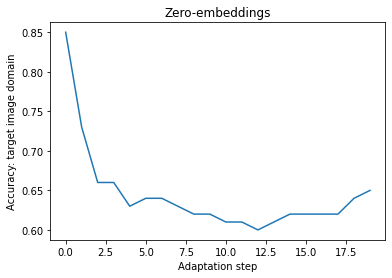

In [20]:
plt.plot(range(20), accs)
plt.title('Zero-embeddings')
plt.ylabel('Accuracy: target image domain')
plt.xlabel('Adaptation step')

### Predict _target_ domain from adapted hidden representation (probe retrained at each step)

In [15]:
accs = []
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []

    for _, row in df.iterrows():
        X.append(eval(row[f'adapted h0 s{step}']))
        Y.append(row['target domain'])

    X, Y = np.array(X), np.array(Y)

    report, _, _ = train_and_classify(X, Y, CLF_TYPE)
#     print(report)
    accs.append(float(report.split('accuracy')[1].split()[0]))
    
#     pca = PCA(2)
#     scaler = preprocessing.StandardScaler().fit(X)
#     X_2dim = pca.fit_transform(scaler.transform(X))

#     for l in df['target domain'].unique():
#         plt.scatter(X_2dim[Y == l, 0], X_2dim[Y == l, 1], label=l)
#     plt.legend()
#     plt.show()

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19


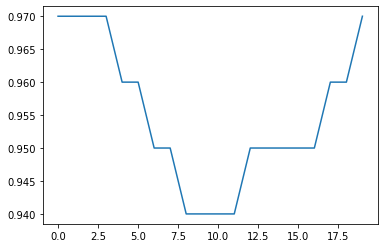

In [16]:
plt.plot(range(20), accs)

# Is the domain of the listener encoded in $h_0$?

### Try predicting _listener_ domain from non-adapted hidden representation _using the image domain probing classifier_.  

That is, is the listener domain encoded similarly to the target domain?

In [23]:
X, Y = [], []

for _, row in df.iterrows():
    X.append(eval(row['original h0']))
    Y.append(row['listener domain'])

X, Y = np.array(X), np.array(Y)


print(classify(X, Y, target_classifier, target_scaler))

              precision    recall  f1-score   support

        food       0.00      0.00      0.00      97.0
      indoor       0.00      0.00      0.00       0.0
     outdoor       0.00      0.00      0.00       0.0

    accuracy                           0.00      97.0
   macro avg       0.00      0.00      0.00      97.0
weighted avg       0.00      0.00      0.00      97.0



/Users/mario/code/pb_speaker_adaptation/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mario/code/pb_speaker_adaptation/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mario/code/pb_speaker_adaptation/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

### Predict _listener_ domain from non-adapted hidden representation _using a listener domain probing classifier_.  

In [24]:
X, Y = [], []

for _, row in df.iterrows():
    X.append(eval(row['original h0']))
    Y.append(row['listener domain'])

X, Y = np.array(X), np.array(Y)


report, listener_classifier, listener_scaler = train_and_classify(X, Y, CLF_TYPE)
print(report)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'food'

### Predict _listener_ domain from adapted hidden representation (probe trained on non-adapted)

In [ ]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []
    for _, row in df.iterrows():
        X.append(eval(row[f'adapted h0 s{step}']))
        Y.append(row['listener domain'])

    X, Y = np.array(X), np.array(Y)
    
    print(classify(X, Y, listener_classifier, listener_scaler))
#     print(train_and_classify(X, Y, CLF_TYPE))

### Predict _listener_ domain from adapted hidden representation (probe retrained at each step)

In [ ]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []
    for _, row in df.iterrows():
        X.append(eval(row[f'adapted h0 s{step}']))
        Y.append(row['listener domain'])

    X, Y = np.array(X), np.array(Y)
    
    report, _, _ = train_and_classify(X, Y, CLF_TYPE)
    print(report)

# Is the adaptation itself (described as the difference between adapted and non-adapted $h_0$) predictive of listener domains?

### Predict listener domain from difference between adapted and non-adapted hidden representation (probe retrained at each step)

In [ ]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []
    for _, row in df.iterrows():
        X.append(np.array(eval(row[f'adapted h0 s{step}'])) - np.array(eval(row['original h0'])))
        Y.append(row['listener domain'])

    X, Y = np.array(X), np.array(Y)

    report, _, _ = train_and_classify(X, Y, CLF_TYPE)
    print(report)

## Diagnostic clustering

### Cluster non-adapted hidden representations (vs. target domains)

### Cluster adapted hidden representations (vs. target domains)



### Cluster adapted hidden representations (vs. listener domains)


### Cluster difference between adapted and non-adapted hidden representations (vs. listener domains)
